## Importing Libraries as Needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset 

In [2]:
df = pd.read_csv('/Users/laetitia/IronHack/data-ft-par-labs/Projects/Week-7_8/data/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Basic data info, missing values and data desciption

In [4]:
df.info()

# From the info, there seem to be no misisng values
# The datatype is either interger of float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

# No missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Preliminary Data Exploration

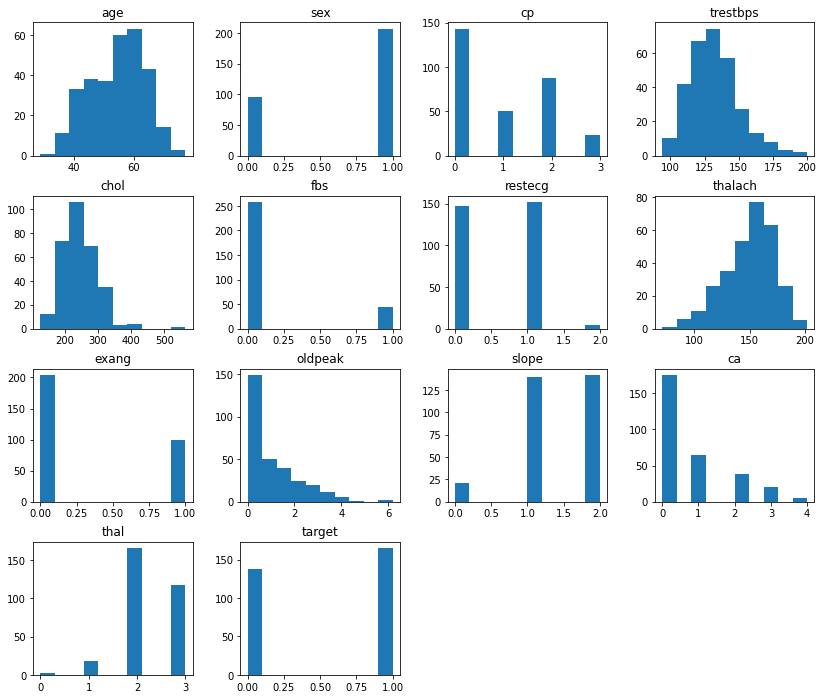

In [7]:
# Overview of dataframe variables distributions

df.hist(layout=(4,4), figsize=(14,12), grid=False)
plt.show()

In [8]:
# Centering plots

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

#### Percentage Surveyed

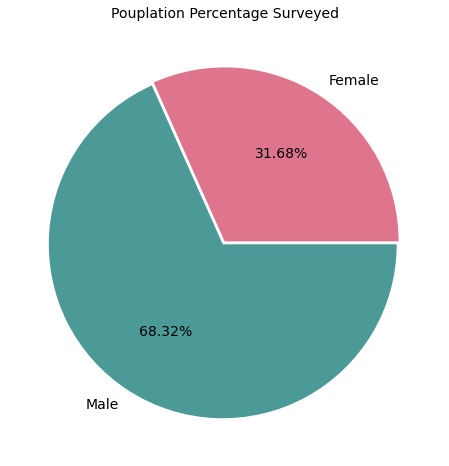

In [9]:
plt.figure(figsize=(10, 8))

explode = (0, 0.02)
color_list = ['#de758d', '#4c9a97']
target = [len(df[df['sex'] == 0]), len(df[df['sex'] == 1])]
labels = ["Female", "Male"]
plt.pie(x=target, labels=labels, autopct='%1.2f%%', colors=color_list, explode=explode, textprops={'fontsize':14})
plt.title("Pouplation Percentage Surveyed", fontsize=14)
plt.show()

#### Heart Attacks by Gender

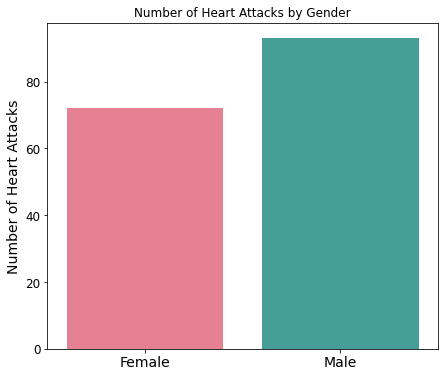

In [10]:
fig = plt.figure(figsize=(7,6))

attack_by_gender = df.groupby('sex')['target'].sum()
plot1 = sns.barplot(x= attack_by_gender.index, y = attack_by_gender.values, palette="husl")
plot1.set(xticklabels=['Female', 'Male'])
plt.xlabel(None)
plt.xticks(fontsize = 14)
plt.ylabel('Number of Heart Attacks', fontsize=14)
plt.yticks(fontsize = 12)
plt.title('Number of Heart Attacks by Gender', fontsize=12)
plt.show()

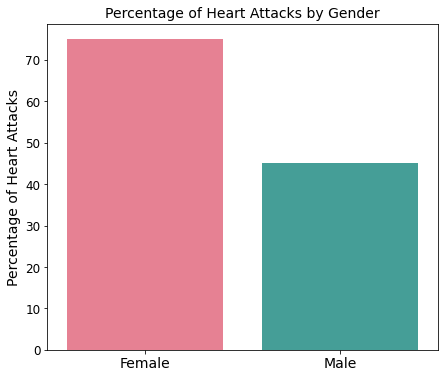

In [11]:
fig = plt.figure(figsize=(7,6))

attack_by_gender = df.groupby('sex')['target'].mean().round(2)*100
plot2 = sns.barplot(x= attack_by_gender.index, y = attack_by_gender.values, palette="husl")
plot2.set(xticklabels=['Female', 'Male'])
plt.xlabel(None)
plt.xticks(fontsize = 14)
plt.ylabel('Percentage of Heart Attacks', fontsize=14)
plt.yticks(fontsize = 12)
plt.title('Percentage of Heart Attacks by Gender', fontsize=14)

# for i in range(len(attack_by_gender)):
#     plot2.annotate(str(attack_by_gender[i]), xy=(i, attack_by_gender[i]), fontsize=14)
plt.show()

##### Observations

- By numbers, males appear to be prone to heart attacks than female
- Based on population sampled, there seem to be a higher percentage of females prone to heart attacks

#### Chest Pain by Gender

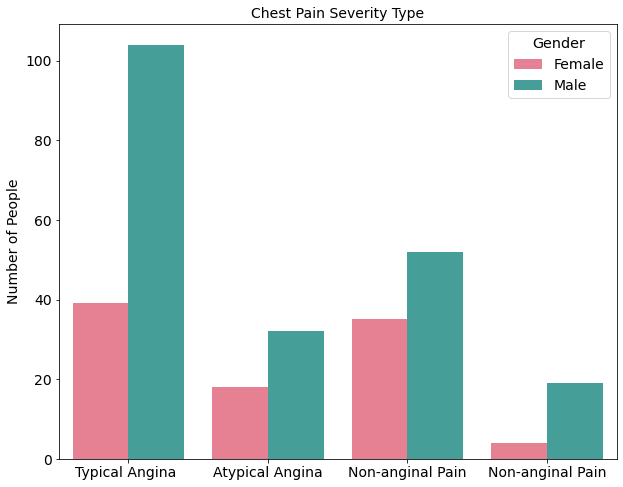

In [12]:
plt.figure(figsize=(10, 8))

plot3 = sns.countplot(data=df, x='cp',hue='sex', palette="husl")
plot3.set(xticklabels=['Typical Angina ', 'Atypical Angina', 'Non-anginal Pain', 'Non-anginal Pain'])
plt.xlabel(None)
plt.xticks(fontsize=14)
plt.ylabel("Number of People", fontsize=14)
plt.yticks(fontsize=14)
plt.title("Chest Pain Severity Type", fontsize=14)
plt.legend(['Female', 'Male'], fontsize=14, title='Gender', title_fontsize='x-large')
plt.show()

#### Chest Pain by Age

/Users/laetitia/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


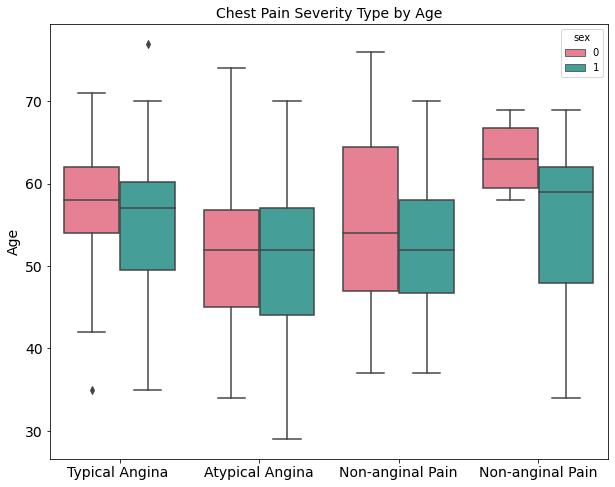

In [13]:
plt.figure(figsize=(10, 8))

plot4 = sns.boxplot( df['cp'], df['age'], hue='sex', palette='husl', data=df)
plot4.set(xticklabels=['Typical Angina ', 'Atypical Angina', 'Non-anginal Pain', 'Non-anginal Pain'])
plt.xlabel(None)
plt.xticks(fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.yticks(fontsize=14)
plt.title("Chest Pain Severity Type by Age", fontsize=14)
# plt.legend( ('Female', 1='Male'), fontsize=14)
plt.show()

#### Cholesterol by Age

/Users/laetitia/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1440x864 with 0 Axes>

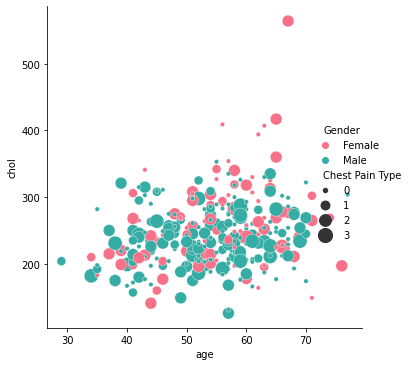

In [14]:
fig = plt.figure(figsize=(20, 12))

plot5 = sns.relplot(df.age, df.chol, hue='sex', data=df, palette='husl', size='cp', sizes=(20,200), legend='brief')
    
plot5._legend.texts[0].set_text("Gender")
gender_labels = ["Gender", "Female",'Male']
for t, l in zip(plot5._legend.texts, gender_labels): 
    t.set_text(l)

plot5._legend.texts[3].set_text("Chest Pain Type")

# cp_labels = [ "Chest Pain Type", 'Typical Angina ', 'Atypical Angina', 'Non-anginal Pain', 'Non-anginal Pain']
# for t, l in zip(plot5._legend.texts[3], cp_labels): 
#     t.set_text(l)

plt.show()

/Users/laetitia/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1440x864 with 0 Axes>

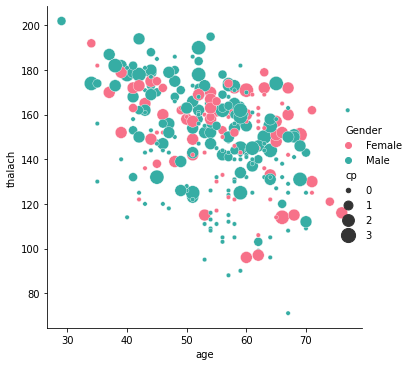

In [15]:
fig = plt.figure(figsize=(20, 12))

plot6 = sns.relplot(df.age, df.thalach, hue='sex', data=df, palette='husl', size='cp', sizes=(20,200))

plot6._legend.texts[0].set_text("Gender")
gender_labels = ["Gender", "Female",'Male']
for t, l in zip(plot6._legend.texts, gender_labels): 
    t.set_text(l)

plot5._legend.texts[3].set_text("Chest Pain Type")

#### Pair Plots

<Figure size 720x432 with 0 Axes>

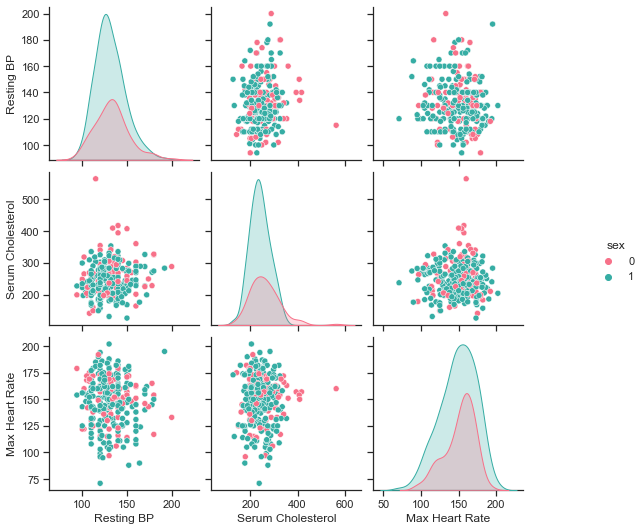

In [16]:
fig = plt.figure(figsize=(10,6))

sns.set(style='ticks')
data = df[[ 'trestbps', 'chol', 'thalach', 'sex']]
plot7 = sns.pairplot(data, hue='sex', palette='husl')
replacements = {'trestbps': 'Resting BP', 'chol': 'Serum Cholesterol',
                'thalach': 'Max Heart Rate'}

for i in range(3):
    for j in range(3):
        xlabel = plot7.axes[i][j].get_xlabel()
        ylabel = plot7.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            plot7.axes[i][j].set_xlabel(replacements[xlabel], fontsize=12)
        if ylabel in replacements.keys():
            plot7.axes[i][j].set_ylabel(replacements[ylabel], fontsize=12)
            
# for i in range(len(plot7.fig.get_children()[-1].texts)):
#     label = plot7.fig.get_children()[-1].texts[i].get_text()
#     if label in replacements.keys():
#         plot7.fig.get_children()[-1].texts[i].set_text(replacements[label], fontsize=14)
            
plot7.fig.get_children()[-1].set_bbox_to_anchor((1.1, 0.5, 0, 0))
plt.show()

#### Heatmap Correlation of Features to chech for colinearity

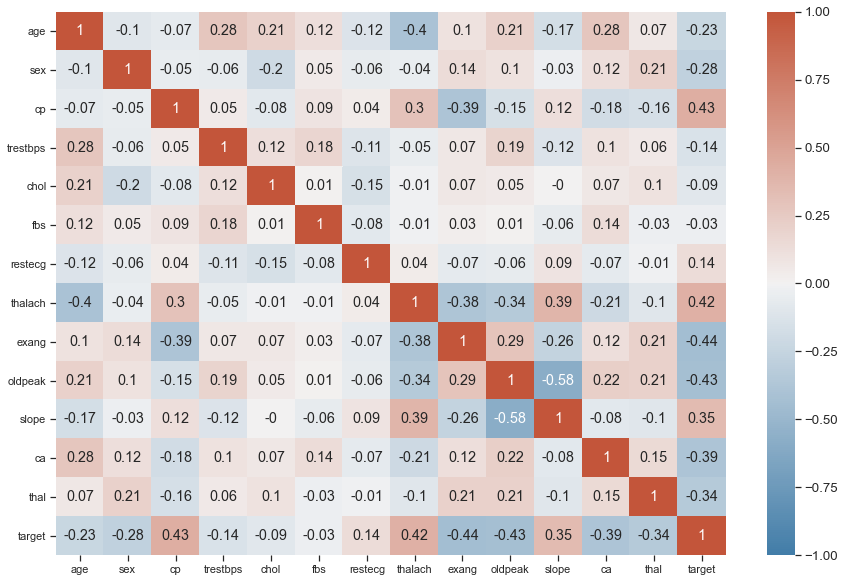

In [17]:
fig, ax = plt.subplots(figsize=(15,10))

cmap = sns.diverging_palette(240, 20, as_cmap=True)
sns.set(font_scale=1.2)
sns.heatmap(df.corr().round(2), annot=True, cmap = cmap, ax=ax, vmin=-1, vmax=1)

plt.show()

##### Observations

- From the heatmap, there seem to be no colinearity between the variables

## Evaluating Some Algorithms

### Supervised Learning - Classification Modeling

#### Spliting Data into Training and Testing Sets

In [18]:
# Import function to split the DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import different models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Import the scoring
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1),
                                                    df.target,
                                                    test_size=0.3,
                                                    stratify=df.target, 
                                                    random_state = 42)

#### Scaling Data

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Logistic Regression Model

In [21]:
model1 = LogisticRegression(max_iter = 1e5)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix')
print('\n')
print(conf_matrix)
print('\n')
print('Accuracy Score for Logistic Regression:', accuracy_score(y_test, y_pred1).round(3)*100)
print('---------------------------------------------')
print('Precision Score for Logistic Regression:', precision_score(y_test, y_pred1).round(3)*100)
print('---------------------------------------------')
print('Recall Score for Logistic Regression:', recall_score(y_test, y_pred1).round(2)*100)
print('---------------------------------------------')
print('f1 Score for Logistic Regression:', f1_score(y_test, y_pred1).round(3)*100)

Confusion Matrix


[[28 13]
 [ 9 41]]


Accuracy Score for Logistic Regression: 75.8
---------------------------------------------
Precision Score for Logistic Regression: 75.9
---------------------------------------------
Recall Score for Logistic Regression: 82.0
---------------------------------------------
f1 Score for Logistic Regression: 78.8


#### KNeighborsClassifier Model

In [22]:
model2= KNeighborsClassifier(4, weights='distance')
model2.fit(X_train, y_train)
y_pred2= model2.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred2)
print('Confusion Matrix')
print('\n')
print(conf_matrix)
print('\n')
print('Accuracy Score for Logistic Regression:', accuracy_score(y_test, y_pred2).round(3)*100)
print('---------------------------------------------')
print('Precision Score for Logistic Regression:', precision_score(y_test, y_pred2).round(2)*100)
print('---------------------------------------------')
print('Recall Score for Logistic Regression:', recall_score(y_test, y_pred2).round(2)*100)
print('---------------------------------------------')
print('f1 Score for Logistic Regression:', f1_score(y_test, y_pred2).round(3)*100)

Confusion Matrix


[[27 14]
 [11 39]]


Accuracy Score for Logistic Regression: 72.5
---------------------------------------------
Precision Score for Logistic Regression: 74.0
---------------------------------------------
Recall Score for Logistic Regression: 78.0
---------------------------------------------
f1 Score for Logistic Regression: 75.7


#### Support Vector Classifier

In [23]:
model3= SVC()
model3.fit(X_train, y_train)
y_pred3= model3.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred3)
print('Confusion Matrix')
print('\n')
print(conf_matrix)
print('\n')
print('Accuracy Score for Logistic Regression:', accuracy_score(y_test, y_pred3).round(3)*100)
print('---------------------------------------------')
print('Precision Score for Logistic Regression:', precision_score(y_test, y_pred3).round(2)*100)
print('---------------------------------------------')
print('Recall Score for Logistic Regression:', recall_score(y_test, y_pred3).round(3)*100)
print('---------------------------------------------')
print('f1 Score for Logistic Regression:', f1_score(y_test, y_pred3).round(3)*100)

Confusion Matrix


[[30 11]
 [ 8 42]]


Accuracy Score for Logistic Regression: 79.10000000000001
---------------------------------------------
Precision Score for Logistic Regression: 79.0
---------------------------------------------
Recall Score for Logistic Regression: 84.0
---------------------------------------------
f1 Score for Logistic Regression: 81.6


#### Gaussian NB

In [24]:
model4= GaussianNB()
model4.fit(X_train, y_train)
y_pred4= model4.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred4)
print('Confusion Matrix')
print('\n')
print(conf_matrix)
print('\n')
print('Accuracy Score for Logistic Regression:', accuracy_score(y_test, y_pred4).round(3)*100)
print('---------------------------------------------')
print('Precision Score for Logistic Regression:', precision_score(y_test, y_pred4).round(2)*100)
print('---------------------------------------------')
print('Recall Score for Logistic Regression:', recall_score(y_test, y_pred4).round(3)*100)
print('---------------------------------------------')
print('f1 Score for Logistic Regression:', f1_score(y_test, y_pred4).round(3)*100)

Confusion Matrix


[[29 12]
 [ 7 43]]


Accuracy Score for Logistic Regression: 79.10000000000001
---------------------------------------------
Precision Score for Logistic Regression: 78.0
---------------------------------------------
Recall Score for Logistic Regression: 86.0
---------------------------------------------
f1 Score for Logistic Regression: 81.89999999999999


#### Decision Tree

In [25]:
model5= DecisionTreeClassifier()
model5.fit(X_train, y_train)
y_pred5= model5.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred5)
print('Confusion Matrix')
print('\n')
print(conf_matrix)
print('\n')
print('Accuracy Score for Logistic Regression:', accuracy_score(y_test, y_pred5).round(3)*100)
print('---------------------------------------------')
print('Precision Score for Logistic Regression:', precision_score(y_test, y_pred5).round(2)*100)
print('---------------------------------------------')
print('Recall Score for Logistic Regression:', recall_score(y_test, y_pred5).round(3)*100)
print('---------------------------------------------')
print('f1 Score for Logistic Regression:', f1_score(y_test, y_pred5).round(3)*100)

Confusion Matrix


[[29 12]
 [10 40]]


Accuracy Score for Logistic Regression: 75.8
---------------------------------------------
Precision Score for Logistic Regression: 77.0
---------------------------------------------
Recall Score for Logistic Regression: 80.0
---------------------------------------------
f1 Score for Logistic Regression: 78.4


#### Random Forest

In [26]:
model6=RandomForestClassifier()
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred6)
print('Confusion Matrix')
print('\n')
print(conf_matrix)
print('\n')
print('Accuracy Score for Logistic Regression:', accuracy_score(y_test, y_pred6).round(2)*100)
print('---------------------------------------------')
print('Precision Score for Logistic Regression:', precision_score(y_test, y_pred6).round(2)*100)
print('---------------------------------------------')
print('Recall Score for Logistic Regression:', recall_score(y_test, y_pred6).round(3)*100)
print('---------------------------------------------')
print('f1 Score for Logistic Regression:', f1_score(y_test, y_pred6).round(3)*100)

Confusion Matrix


[[28 13]
 [ 6 44]]


Accuracy Score for Logistic Regression: 79.0
---------------------------------------------
Precision Score for Logistic Regression: 77.0
---------------------------------------------
Recall Score for Logistic Regression: 88.0
---------------------------------------------
f1 Score for Logistic Regression: 82.19999999999999


#### AdaBoost

In [27]:
model7=AdaBoostClassifier()
model7.fit(X_train, y_train)
y_pred7 = model7.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred7)
print('Confusion Matrix')
print('\n')
print(conf_matrix)
print('\n')
print('Accuracy Score for Logistic Regression:', accuracy_score(y_test, y_pred7).round(2)*100)
print('---------------------------------------------')
print('Precision Score for Logistic Regression:', precision_score(y_test, y_pred7).round(2)*100)
print('---------------------------------------------')
print('Recall Score for Logistic Regression:', recall_score(y_test, y_pred7).round(3)*100)
print('---------------------------------------------')
print('f1 Score for Logistic Regression:', f1_score(y_test, y_pred7).round(3)*100)

Confusion Matrix


[[27 14]
 [ 9 41]]


Accuracy Score for Logistic Regression: 75.0
---------------------------------------------
Precision Score for Logistic Regression: 75.0
---------------------------------------------
Recall Score for Logistic Regression: 82.0
---------------------------------------------
f1 Score for Logistic Regression: 78.10000000000001


#### XGBoost

In [28]:
model8=XGBClassifier()
model8.fit(X_train, y_train)
y_pred8 = model8.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred8)
print('Confusion Matrix')
print('\n')
print(conf_matrix)
print('\n')
print('Accuracy Score for Logistic Regression:', accuracy_score(y_test, y_pred8).round(2)*100)
print('---------------------------------------------')
print('Precision Score for Logistic Regression:', precision_score(y_test, y_pred8).round(2)*100)
print('---------------------------------------------')
print('Recall Score for Logistic Regression:', recall_score(y_test, y_pred8).round(3)*100)
print('---------------------------------------------')
print('f1 Score for Logistic Regression:', f1_score(y_test, y_pred8).round(3)*100)

[22:45:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix


[[29 12]
 [12 38]]


Accuracy Score for Logistic Regression: 74.0
---------------------------------------------
Precision Score for Logistic Regression: 76.0
---------------------------------------------
Recall Score for Logistic Regression: 76.0
---------------------------------------------
f1 Score for Logistic Regression: 76.0


/Users/laetitia/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


#### LightGBM

In [29]:
model9=LGBMClassifier()
model9.fit(X_train, y_train)
y_pred9 = model9.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred9)
print('Confusion Matrix')
print('\n')
print(conf_matrix)
print('\n')
print('Accuracy Score for Logistic Regression:', accuracy_score(y_test, y_pred9).round(2)*100)
print('---------------------------------------------')
print('Precision Score for Logistic Regression:', precision_score(y_test, y_pred9).round(2)*100)
print('---------------------------------------------')
print('Recall Score for Logistic Regression:', recall_score(y_test, y_pred9).round(3)*100)
print('---------------------------------------------')
print('f1 Score for Logistic Regression:', f1_score(y_test, y_pred9).round(3)*100)

Confusion Matrix


[[29 12]
 [ 9 41]]


Accuracy Score for Logistic Regression: 77.0
---------------------------------------------
Precision Score for Logistic Regression: 77.0
---------------------------------------------
Recall Score for Logistic Regression: 82.0
---------------------------------------------
f1 Score for Logistic Regression: 79.60000000000001


#### CatBoost

In [30]:
model10=CatBoostClassifier()
model10.fit(X_train, y_train.map(int))
y_pred10 = model10.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred10)
print('Confusion Matrix')
print('\n')
print(conf_matrix)
print('\n')
print('Accuracy Score for Logistic Regression:', accuracy_score(y_test, y_pred10).round(2)*100)
print('---------------------------------------------')
print('Precision Score for Logistic Regression:', precision_score(y_test, y_pred10).round(2)*100)
print('---------------------------------------------')
print('Recall Score for Logistic Regression:', recall_score(y_test, y_pred10).round(3)*100)
print('---------------------------------------------')
print('f1 Score for Logistic Regression:', f1_score(y_test, y_pred10).round(3)*100)

Learning rate set to 0.005312
0:	learn: 0.6887687	total: 56.5ms	remaining: 56.4s
1:	learn: 0.6840056	total: 57.7ms	remaining: 28.8s
2:	learn: 0.6798661	total: 58.9ms	remaining: 19.6s
3:	learn: 0.6753543	total: 60.1ms	remaining: 15s
4:	learn: 0.6712418	total: 61.3ms	remaining: 12.2s
5:	learn: 0.6669249	total: 62.4ms	remaining: 10.3s
6:	learn: 0.6631434	total: 63.5ms	remaining: 9.01s
7:	learn: 0.6589409	total: 64.6ms	remaining: 8.02s
8:	learn: 0.6550848	total: 65.8ms	remaining: 7.24s
9:	learn: 0.6506380	total: 66.9ms	remaining: 6.62s
10:	learn: 0.6478924	total: 68ms	remaining: 6.11s
11:	learn: 0.6434766	total: 70.2ms	remaining: 5.78s
12:	learn: 0.6393358	total: 72.1ms	remaining: 5.47s
13:	learn: 0.6352446	total: 73.8ms	remaining: 5.2s
14:	learn: 0.6313537	total: 75.6ms	remaining: 4.96s
15:	learn: 0.6276038	total: 77.2ms	remaining: 4.75s
16:	learn: 0.6251796	total: 78.4ms	remaining: 4.53s
17:	learn: 0.6221138	total: 80ms	remaining: 4.36s
18:	learn: 0.6192334	total: 82.5ms	remaining: 4.26s

168:	learn: 0.3385526	total: 247ms	remaining: 1.22s
169:	learn: 0.3379067	total: 249ms	remaining: 1.22s
170:	learn: 0.3370520	total: 250ms	remaining: 1.21s
171:	learn: 0.3361649	total: 252ms	remaining: 1.21s
172:	learn: 0.3351563	total: 253ms	remaining: 1.21s
173:	learn: 0.3341206	total: 254ms	remaining: 1.21s
174:	learn: 0.3335309	total: 256ms	remaining: 1.2s
175:	learn: 0.3325261	total: 257ms	remaining: 1.2s
176:	learn: 0.3315953	total: 258ms	remaining: 1.2s
177:	learn: 0.3303695	total: 259ms	remaining: 1.2s
178:	learn: 0.3293874	total: 261ms	remaining: 1.2s
179:	learn: 0.3288285	total: 262ms	remaining: 1.19s
180:	learn: 0.3282345	total: 263ms	remaining: 1.19s
181:	learn: 0.3275149	total: 265ms	remaining: 1.19s
182:	learn: 0.3263632	total: 267ms	remaining: 1.19s
183:	learn: 0.3256290	total: 268ms	remaining: 1.19s
184:	learn: 0.3247710	total: 269ms	remaining: 1.19s
185:	learn: 0.3236733	total: 271ms	remaining: 1.19s
186:	learn: 0.3229675	total: 272ms	remaining: 1.18s
187:	learn: 0.322

348:	learn: 0.2265647	total: 427ms	remaining: 796ms
349:	learn: 0.2262660	total: 428ms	remaining: 796ms
350:	learn: 0.2257760	total: 430ms	remaining: 794ms
351:	learn: 0.2253373	total: 431ms	remaining: 793ms
352:	learn: 0.2250187	total: 432ms	remaining: 792ms
353:	learn: 0.2246194	total: 433ms	remaining: 791ms
354:	learn: 0.2239811	total: 434ms	remaining: 789ms
355:	learn: 0.2235811	total: 435ms	remaining: 787ms
356:	learn: 0.2234730	total: 436ms	remaining: 785ms
357:	learn: 0.2231965	total: 437ms	remaining: 783ms
358:	learn: 0.2227459	total: 437ms	remaining: 781ms
359:	learn: 0.2223116	total: 438ms	remaining: 780ms
360:	learn: 0.2217062	total: 439ms	remaining: 778ms
361:	learn: 0.2214000	total: 441ms	remaining: 777ms
362:	learn: 0.2208975	total: 442ms	remaining: 776ms
363:	learn: 0.2205650	total: 443ms	remaining: 774ms
364:	learn: 0.2202143	total: 445ms	remaining: 773ms
365:	learn: 0.2199576	total: 446ms	remaining: 773ms
366:	learn: 0.2193964	total: 448ms	remaining: 772ms
367:	learn: 

529:	learn: 0.1686646	total: 606ms	remaining: 537ms
530:	learn: 0.1684658	total: 608ms	remaining: 537ms
531:	learn: 0.1681804	total: 609ms	remaining: 536ms
532:	learn: 0.1681611	total: 610ms	remaining: 534ms
533:	learn: 0.1678819	total: 611ms	remaining: 533ms
534:	learn: 0.1675060	total: 613ms	remaining: 533ms
535:	learn: 0.1671369	total: 614ms	remaining: 531ms
536:	learn: 0.1667861	total: 614ms	remaining: 530ms
537:	learn: 0.1666115	total: 615ms	remaining: 528ms
538:	learn: 0.1663734	total: 616ms	remaining: 527ms
539:	learn: 0.1659654	total: 617ms	remaining: 526ms
540:	learn: 0.1656473	total: 618ms	remaining: 524ms
541:	learn: 0.1654422	total: 619ms	remaining: 523ms
542:	learn: 0.1651684	total: 620ms	remaining: 522ms
543:	learn: 0.1649616	total: 621ms	remaining: 521ms
544:	learn: 0.1646276	total: 622ms	remaining: 519ms
545:	learn: 0.1643778	total: 623ms	remaining: 518ms
546:	learn: 0.1640968	total: 625ms	remaining: 518ms
547:	learn: 0.1638520	total: 626ms	remaining: 516ms
548:	learn: 

711:	learn: 0.1313325	total: 786ms	remaining: 318ms
712:	learn: 0.1312239	total: 787ms	remaining: 317ms
713:	learn: 0.1310972	total: 788ms	remaining: 316ms
714:	learn: 0.1309161	total: 790ms	remaining: 315ms
715:	learn: 0.1306147	total: 791ms	remaining: 314ms
716:	learn: 0.1303955	total: 792ms	remaining: 313ms
717:	learn: 0.1302164	total: 793ms	remaining: 312ms
718:	learn: 0.1299289	total: 794ms	remaining: 310ms
719:	learn: 0.1298153	total: 795ms	remaining: 309ms
720:	learn: 0.1295019	total: 796ms	remaining: 308ms
721:	learn: 0.1293332	total: 798ms	remaining: 307ms
722:	learn: 0.1291080	total: 798ms	remaining: 306ms
723:	learn: 0.1289577	total: 799ms	remaining: 305ms
724:	learn: 0.1288315	total: 800ms	remaining: 303ms
725:	learn: 0.1286104	total: 801ms	remaining: 302ms
726:	learn: 0.1285089	total: 802ms	remaining: 301ms
727:	learn: 0.1283647	total: 804ms	remaining: 300ms
728:	learn: 0.1281321	total: 805ms	remaining: 299ms
729:	learn: 0.1279305	total: 806ms	remaining: 298ms
730:	learn: 

891:	learn: 0.1037366	total: 964ms	remaining: 117ms
892:	learn: 0.1036331	total: 966ms	remaining: 116ms
893:	learn: 0.1035724	total: 967ms	remaining: 115ms
894:	learn: 0.1034908	total: 969ms	remaining: 114ms
895:	learn: 0.1032876	total: 970ms	remaining: 113ms
896:	learn: 0.1031716	total: 971ms	remaining: 111ms
897:	learn: 0.1030524	total: 972ms	remaining: 110ms
898:	learn: 0.1028958	total: 973ms	remaining: 109ms
899:	learn: 0.1028024	total: 975ms	remaining: 108ms
900:	learn: 0.1026947	total: 976ms	remaining: 107ms
901:	learn: 0.1024976	total: 976ms	remaining: 106ms
902:	learn: 0.1024590	total: 977ms	remaining: 105ms
903:	learn: 0.1023468	total: 978ms	remaining: 104ms
904:	learn: 0.1022528	total: 979ms	remaining: 103ms
905:	learn: 0.1021216	total: 980ms	remaining: 102ms
906:	learn: 0.1018987	total: 981ms	remaining: 101ms
907:	learn: 0.1018069	total: 983ms	remaining: 99.6ms
908:	learn: 0.1017386	total: 984ms	remaining: 98.5ms
909:	learn: 0.1016254	total: 986ms	remaining: 97.5ms
910:	lear

In [31]:
y_train.map(int)

144    1
215    0
230    0
66     1
288    0
      ..
170    0
59     1
37     1
116    1
122    1
Name: target, Length: 212, dtype: int64

In [32]:
a, p, r, f = [], [], [], []
for model in [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10]:
    a.append(accuracy_score(y_test, model.predict(X_test)))
    p.append(precision_score(y_test, model.predict(X_test)))
    r.append(recall_score(y_test, model.predict(X_test)))
    f.append(f1_score(y_test, model.predict(X_test)))

In [44]:
a

[0.7582417582417582,
 0.7252747252747253,
 0.7912087912087912,
 0.7912087912087912,
 0.7582417582417582,
 0.7912087912087912,
 0.7472527472527473,
 0.7362637362637363,
 0.7692307692307693,
 0.7802197802197802]

In [33]:
model_score = pd.DataFrame([a,p,r,f],
             columns = ['LR',
                        'KNN',
                        'SVC',
                        'NB',
                        'DT',
                        'RF',
                        'Ada',
                        'XGB',
                        'LGBM',
                        'Cat']).T.sort_values(by=3, ascending=False).rename(columns={0:'Accuracy', 1: 'Precision', 2: 'Recall', 3: 'F1'}) 

In [34]:
model_score

,Accuracy,Precision,Recall,F1
RF,0.791209,0.771930,0.88,0.822430
NB,0.791209,0.781818,0.86,0.819048
SVC,0.791209,0.792453,0.84,0.815534
Cat,0.780220,0.767857,0.86,0.811321
LGBM,0.769231,0.773585,0.82,0.796117
LR,0.758242,0.759259,0.82,0.788462
DT,0.758242,0.769231,0.80,0.784314
Ada,0.747253,0.745455,0.82,0.780952
XGB,0.736264,0.760000,0.76,0.760000
KNN,0.725275,0.735849,0.78,0.757282


#### Model Feature Importance

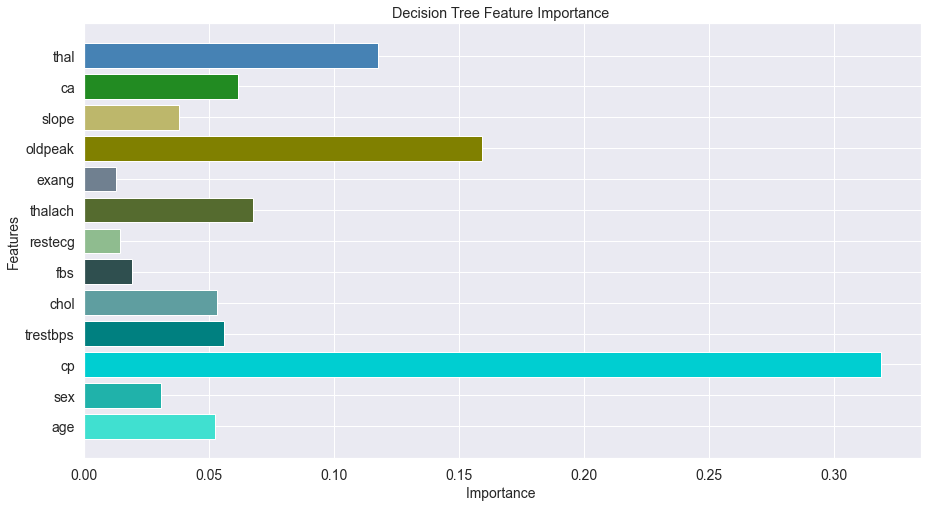

In [35]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': model5.feature_importances_})
plt.figure(figsize=(15,8))
plt.title("Decision Tree Feature Importance ")
plt.xlabel("Importance ", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.barh(imp_feature['Feature'],imp_feature['Importance'], color = ['turquoise', 'lightseagreen', 'darkturquoise', 
                                                                   'teal', 'cadetblue', 'darkslategrey','darkseagreen',
                                                                   'darkolivegreen', 'slategrey', 'olive', 'darkkhaki',
                                                                   'forestgreen', 'steelblue', 'gray'])
plt.show()

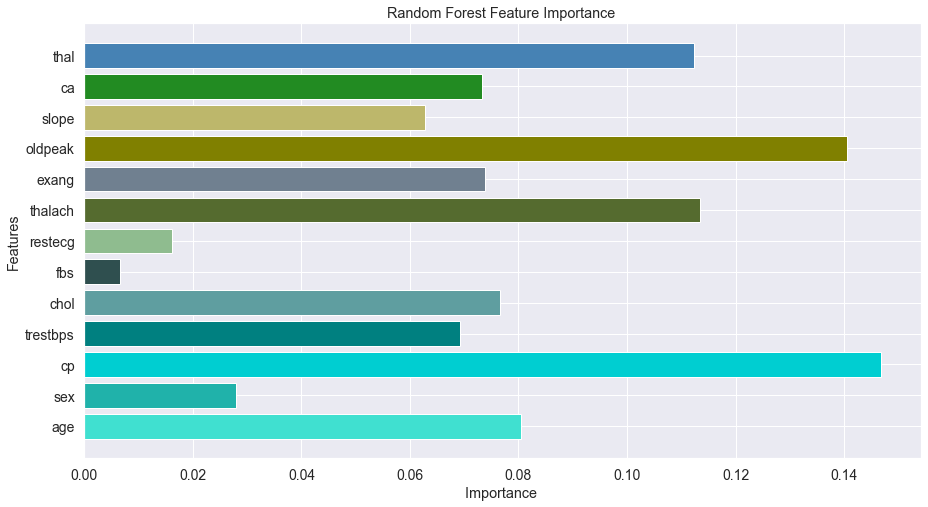

In [36]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': model6.feature_importances_})
plt.figure(figsize=(15,8))
plt.title("Random Forest Feature Importance ")
plt.xlabel("Importance ")
plt.ylabel("Features")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.barh(imp_feature['Feature'],imp_feature['Importance'], color = ['turquoise', 'lightseagreen', 'darkturquoise', 
                                                                    'teal', 'cadetblue', 'darkslategrey',
                                                                    'darkseagreen','darkolivegreen', 'slategrey', 
                                                                   'olive', 'darkkhaki','forestgreen', 'steelblue',
                                                                    'gray'])
plt.show()

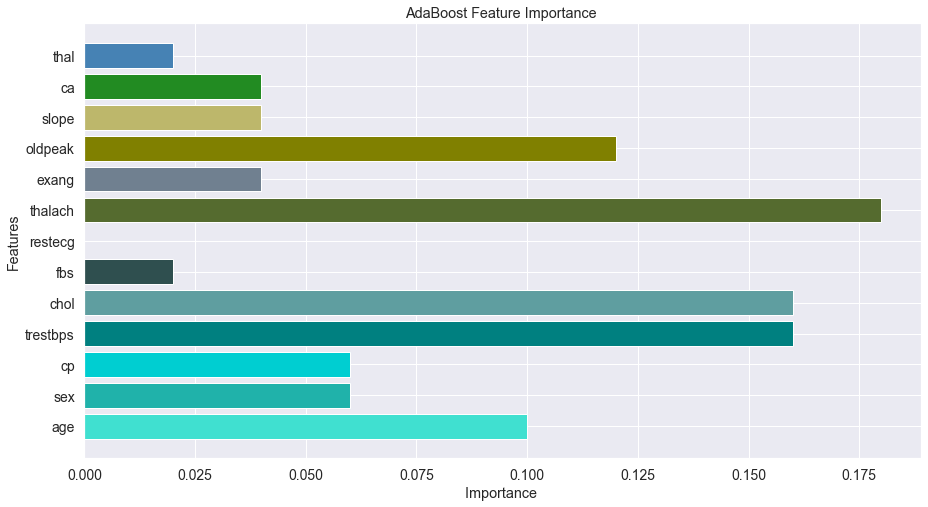

In [37]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': model7.feature_importances_})
plt.figure(figsize=(15,8))
plt.title("AdaBoost Feature Importance ")
plt.xlabel("Importance ")
plt.ylabel("Features")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = ['turquoise', 'lightseagreen', 'darkturquoise', 
                                                                    'teal', 'cadetblue', 'darkslategrey',
                                                                    'darkseagreen','darkolivegreen', 'slategrey', 
                                                                   'olive', 'darkkhaki','forestgreen', 'steelblue',
                                                                    'gray'])
plt.show()

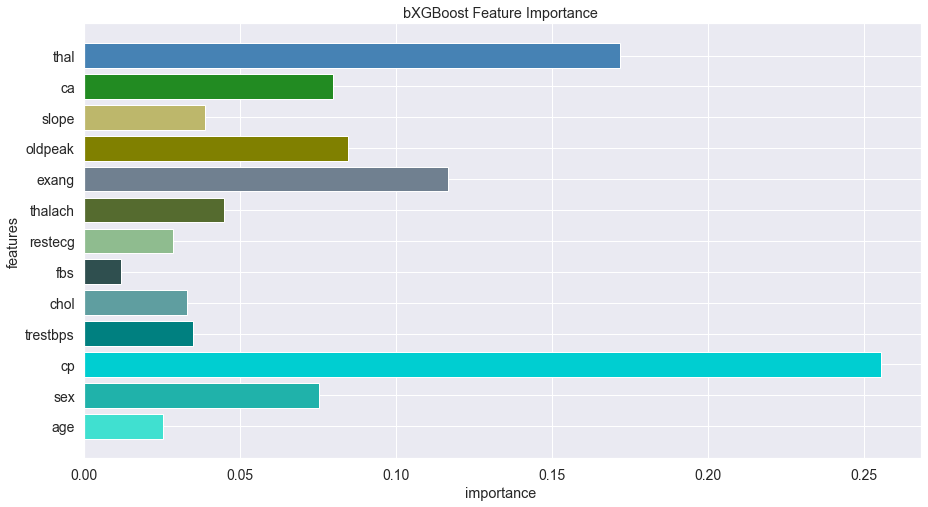

In [38]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': model8.feature_importances_})
plt.figure(figsize=(15,8))
plt.title("bXGBoost Feature Importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = ['turquoise', 'lightseagreen', 'darkturquoise', 
                                                                    'teal', 'cadetblue', 'darkslategrey',
                                                                    'darkseagreen','darkolivegreen', 'slategrey', 
                                                                   'olive', 'darkkhaki','forestgreen', 'steelblue',
                                                                    'gray'])
plt.show()

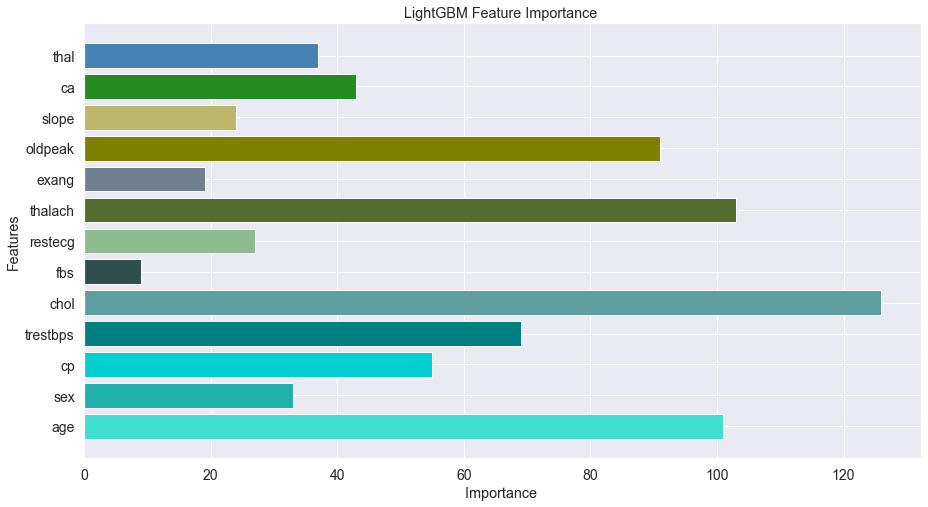

In [39]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': model9.feature_importances_})
plt.figure(figsize=(15,8))
plt.title("LightGBM Feature Importance ")
plt.xlabel("Importance ")
plt.ylabel("Features")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = ['turquoise', 'lightseagreen', 'darkturquoise', 
                                                                    'teal', 'cadetblue', 'darkslategrey',
                                                                    'darkseagreen','darkolivegreen', 'slategrey', 
                                                                   'olive', 'darkkhaki','forestgreen', 'steelblue',
                                                                    'gray'])
plt.show()

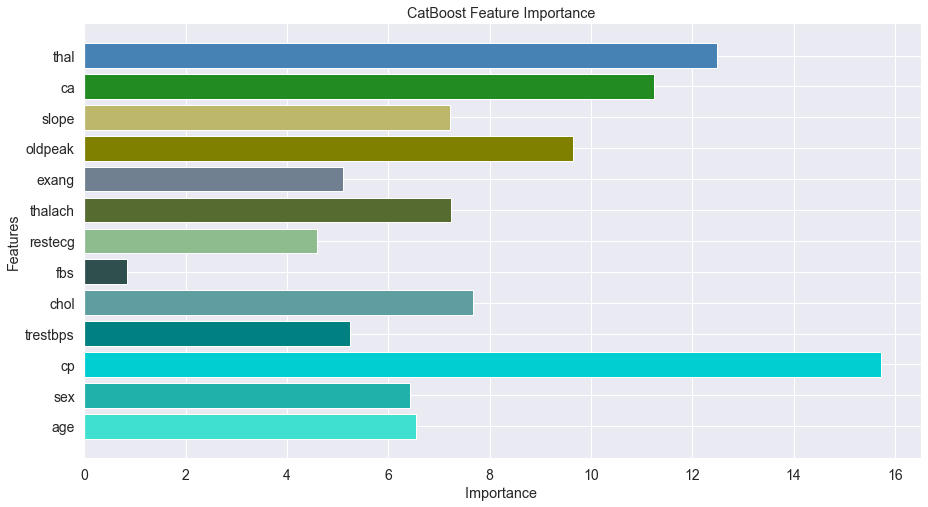

In [40]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': model10.feature_importances_})
plt.figure(figsize=(15,8))
plt.title("CatBoost Feature Importance ")
plt.xlabel("Importance ")
plt.ylabel("Features")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = ['turquoise', 'lightseagreen', 'darkturquoise', 
                                                                   'teal', 'cadetblue', 'darkslategrey',
                                                                   'darkseagreen','darkolivegreen', 'slategrey',
                                                                   'olive', 'darkkhaki','forestgreen', 'steelblue',
                                                                    'gray'])
                                                                 
                                                                   
plt.show()

## Model Evaluation

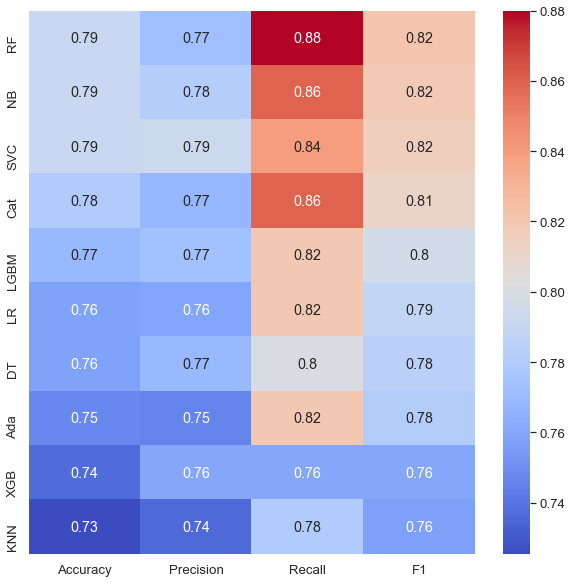

In [41]:
# Create a heatmap of the summary
plt.figure(figsize= (10,10))
sns.heatmap(model_score, annot=True, cmap = 'coolwarm')
plt.show()

In [42]:
models = pd.DataFrame({'Models': ['Logistic Regression','KNN','SVC','Gaussian NB','Decision Tree', 'Random Forest',
                                 'AdaBoost', 'XGBoost', 'LightGBM', 'CatBoost'],
                      'Accuracy': [accuracy_score(y_test, y_pred1).round(3)*100, 
                                   accuracy_score(y_test, y_pred2).round(3)*100, 
                                  accuracy_score(y_test, y_pred3).round(3)*100,
                                  accuracy_score(y_test, y_pred4).round(3)*100,
                                  accuracy_score(y_test, y_pred5).round(3)*100,
                                  accuracy_score(y_test, y_pred6).round(3)*100,
                                  accuracy_score(y_test, y_pred7).round(3)*100,
                                  accuracy_score(y_test, y_pred8).round(3)*100,
                                  accuracy_score(y_test, y_pred9).round(3)*100,
                                  accuracy_score(y_test, y_pred10).round(3)*100]})

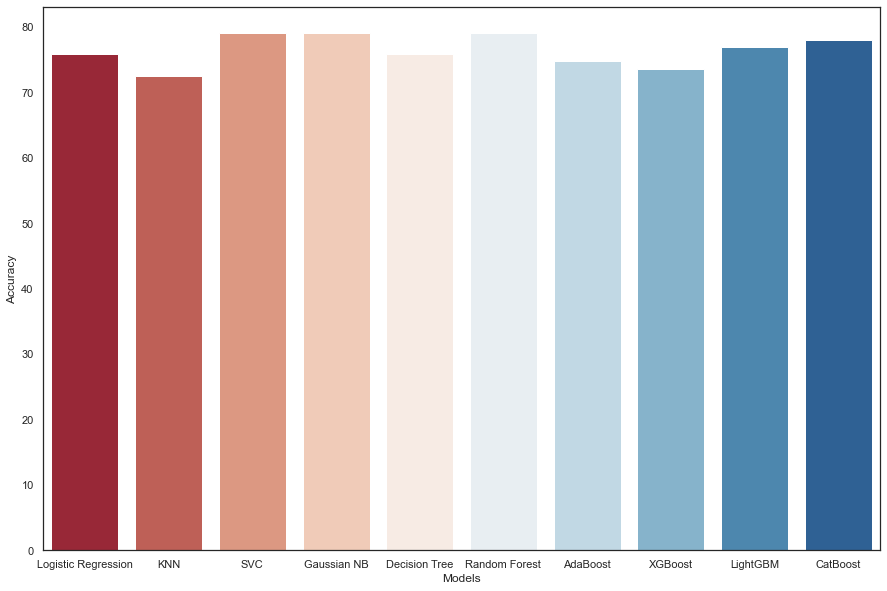

In [43]:
sns.set(style='white')
fig = plt.figure(figsize=(15,10))
sns.barplot(data=models, x=models.Models, y=models.Accuracy, palette='RdBu')
plt.show()